In [1]:
# Jose Ordonez, jmo2782
# Anthony Nguyen, amn3366
# Ruthvik Ananthula, ra37623
# Jayanth Vellanki, jv32689

# League Project

For our project we wanted to attempt to predict the outcome of League of Legends games based on data available during the first half of matches. 

To do this we downloaded data from Kaggle here: https://www.kaggle.com/datasets/fernandorubiogarcia/league-of-legends-high-elo-patch-1016/

The dataset consists of around 60k rows, each representing a game of high ELO League of Legends from various regions of the world.

The data has around 600 columns, better thought of as 60 columns per each of the 10 players, 5 on each team. These included but were not limited to
 damage done, damage taken, gold gained, kills, and the ELO of each player. 

We achieved surprisingly good results with various models, ending with accuracies of up to 77%, comparable to the rate at which we (as pretty average League players) 
can predict the outcome of high ELO matches. 

In [2]:
#You may add additional imports
import warnings
#warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
%matplotlib inline

# WARNING

Try to not rerun this cell too much, it takes time (7 seconds)

In [4]:
# WARNING ---- takes a bit to run, try to not rerun this cell
data = pd.read_csv("match_data.csv", sep=';')
data.describe()

,gameId,t1p1_assists,t1p1_ban_champId,t1p1_champId,t1p1_champLevel,t1p1_damageDealtToObjectives,t1p1_damageDealtToTurrets,t1p1_damageSelfMitigated,t1p1_deaths,t1p1_goldEarned,...,t2p5_trueDamageTaken,t2p5_visionScore,t2p5_wardsKilled,t2p5_wardsPlaced,gameCreation,gameDuration,queueId,average_lp,t1_teamId,t1_win
count,6.015600e+04,60156.000000,60156.000000,60156.000000,60156.000000,60156.000000,60156.000000,60156.000000,60156.000000,60156.000000,...,60156.000000,60156.000000,60156.000000,60156.000000,6.015600e+04,60156.000000,60156.0,60156.000000,60156.0,60156.000000
mean,4.475782e+09,11.098378,160.525750,217.972721,11.328313,2194.054891,993.798424,11615.238846,4.897300,7103.313186,...,1483.261753,17.830374,2.302996,8.151573,1.597807e+12,1508.536123,420.0,2650.895463,100.0,0.503225
std,4.307096e+08,6.590578,220.347592,211.861401,2.468715,2326.125622,1164.201028,9173.058692,2.862788,2164.584228,...,1752.602557,9.499596,2.322034,3.495840,6.836440e+08,385.501188,0.0,237.912238,0.0,0.499994
min,3.522688e+09,0.000000,-1.000000,1.000000,1.000000,0.000000,0.000000,19.000000,0.000000,1505.000000,...,0.000000,0.000000,0.000000,0.000000,1.596660e+12,600.000000,420.0,2351.000000,100.0,0.000000
25%,4.567434e+09,6.000000,37.000000,53.000000,10.000000,566.750000,167.000000,5365.000000,3.000000,5586.000000,...,371.000000,11.000000,1.000000,6.000000,1.597190e+12,1236.000000,420.0,2459.900000,100.0,0.000000
50%,4.598948e+09,10.000000,80.000000,111.000000,11.000000,1584.000000,678.000000,8949.000000,5.000000,7032.000000,...,872.000000,16.000000,2.000000,8.000000,1.597840e+12,1501.000000,420.0,2574.800000,100.0,1.000000
75%,4.760127e+09,15.000000,142.000000,412.000000,13.000000,3108.000000,1459.000000,14906.000000,7.000000,8455.000000,...,1931.000000,23.000000,3.000000,10.000000,1.598390e+12,1772.000000,420.0,2783.200000,100.0,1.000000
max,4.792696e+09,46.000000,876.000000,876.000000,18.000000,51554.000000,51554.000000,97057.000000,21.000000,22013.000000,...,18376.000000,137.000000,26.000000,77.000000,1.599000e+12,3315.000000,420.0,3574.500000,100.0,1.000000


# Data Cleaning

In [5]:
# drop the na values to clean up the data

# This detected that we had some na values
# for item in data.isna().sum():
#     if item > 0 :
#         print(item)
# data.isna().sum()

data = data.dropna()
data.describe()

,gameId,t1p1_assists,t1p1_ban_champId,t1p1_champId,t1p1_champLevel,t1p1_damageDealtToObjectives,t1p1_damageDealtToTurrets,t1p1_damageSelfMitigated,t1p1_deaths,t1p1_goldEarned,...,t2p5_trueDamageTaken,t2p5_visionScore,t2p5_wardsKilled,t2p5_wardsPlaced,gameCreation,gameDuration,queueId,average_lp,t1_teamId,t1_win
count,6.010700e+04,60107.000000,60107.000000,60107.000000,60107.000000,60107.000000,60107.000000,60107.000000,60107.000000,60107.000000,...,60107.000000,60107.000000,60107.000000,60107.000000,6.010700e+04,60107.000000,60107.0,60107.000000,60107.0,60107.000000
mean,4.475679e+09,11.099972,160.534031,217.953250,11.328963,2194.378275,993.699636,11616.844161,4.897799,7103.864791,...,1483.181809,17.831101,2.303176,8.151962,1.597807e+12,1508.621725,420.0,2650.985344,100.0,0.503253
std,4.307696e+08,6.590753,220.341481,211.864289,2.468638,2326.704979,1164.285950,9173.173406,2.862570,2164.736046,...,1752.580371,9.498631,2.321762,3.495456,6.835992e+08,385.478943,0.0,237.945151,0.0,0.499994
min,3.522688e+09,0.000000,-1.000000,1.000000,1.000000,0.000000,0.000000,19.000000,0.000000,1505.000000,...,0.000000,0.000000,0.000000,0.000000,1.596660e+12,600.000000,420.0,2351.000000,100.0,0.000000
25%,4.567433e+09,6.000000,37.000000,53.000000,10.000000,566.000000,166.500000,5367.000000,3.000000,5587.000000,...,371.000000,11.000000,1.000000,6.000000,1.597200e+12,1236.000000,420.0,2459.950000,100.0,0.000000
50%,4.598928e+09,10.000000,80.000000,111.000000,11.000000,1584.000000,678.000000,8950.000000,5.000000,7033.000000,...,872.000000,16.000000,2.000000,8.000000,1.597840e+12,1501.000000,420.0,2574.900000,100.0,1.000000
75%,4.760122e+09,15.000000,142.000000,412.000000,13.000000,3109.000000,1459.000000,14908.000000,7.000000,8455.000000,...,1931.000000,23.000000,3.000000,10.000000,1.598390e+12,1772.000000,420.0,2783.400000,100.0,1.000000
max,4.792696e+09,46.000000,876.000000,876.000000,18.000000,51554.000000,51554.000000,97057.000000,21.000000,22013.000000,...,18376.000000,137.000000,26.000000,77.000000,1.599000e+12,3315.000000,420.0,3574.500000,100.0,1.000000


# Data Exploration Feature Engineering

Feature Engineering - Looking at each team's total gold/kills
  - create columns for Team 1's total gold and Team 2's total gold
  - create columns for Team 1's total gold at 10 minutes and Team 2's total gold at 10 minutes
  - create columns for Team 1's total gold at 15 minutes and Team 2's total gold at 15 minutes
  - create columns for Team 1's total kills and Team 2's total kills

We still want to keep the individual features that we are combining because gold/kills
on certain characters can be more meaningful than others.

In [6]:
# Combine gold earned for entire game (for outlier detection)
data['team1_goldEarned'] = data['t1p1_goldEarned'] + data['t1p2_goldEarned'] + data['t1p3_goldEarned'] + data['t1p4_goldEarned'] + data['t1p5_goldEarned'] 
data['team2_goldEarned'] = data['t2p1_goldEarned'] + data['t2p2_goldEarned'] + data['t2p3_goldEarned'] + data['t2p4_goldEarned'] + data['t2p5_goldEarned']

# Combine number of kills for entire team (for outlier detection)
data['team1_kills'] = data['t1p1_kills'] + data['t1p2_kills'] + data['t1p3_kills'] + data['t1p4_kills'] + data['t1p5_kills']
data['team2_kills'] = data['t2p1_kills'] + data['t2p2_kills'] + data['t2p3_kills'] + data['t2p4_kills'] + data['t2p5_kills'] 

# Combine gold earned for first 10 minutes (for models predicting game outcome) 
data['team1_min10_goldEarned'] = data['t1p1_min10_gold'] + data['t1p2_min10_gold'] + data['t1p3_min10_gold'] + data['t1p4_min10_gold'] + data['t1p5_min10_gold'] 
data['team2_min10_goldEarned'] = data['t2p1_min10_gold'] + data['t2p2_min10_gold'] + data['t2p3_min10_gold'] + data['t2p4_min10_gold'] + data['t2p5_min10_gold'] 

# Combine gold earned for first 15 minut (for models predicting game outcomes) 
data['team1_min15_goldEarned'] = data['t1p1_min15_gold'] + data['t1p2_min15_gold'] + data['t1p3_min15_gold'] + data['t1p4_min15_gold'] + data['t1p5_min15_gold'] 
data['team2_min15_goldEarned'] = data['t2p1_min15_gold'] + data['t2p2_min15_gold'] + data['t2p3_min15_gold'] + data['t2p4_min15_gold'] + data['t2p5_min15_gold'] 



## Feature selection --IMPORTANT--

Note that the following lists do NOT contain names of features. Instead, they contain substrings which are present in the many features we want to include for outlier detection/our models.

In [7]:
'''
Features of importance -
We are using Domain knowledge to determine that these columns are the most 
important for determining the outcome of the game. We are also segmenting
the data into 10 and 15 minutes segments in order to compare results 
at the 10 minute mark, 15 minute mark, and using both 10 and 15 minute data
'''

# all features
whitelist = [
    # features for anomaly detection
    'team1',
    'team2',
    'gameDuration',
    # features for model
    'min10',
    'min15',
    'lp'
]

'''
Features for outlier detection:
Wee use these features for outlier detection because we want to remove excessively
long games (people could be intentionally prolonging games to farm stats, troll, etc).
We also want to remove games that were extremely one sided stomps, as this is (as 
Riot Gaga)es has admited) due to rare errors in matchmaking resulting in wildly 
unbalanced teams.
'''
outlier_test_cols = [
    'team1_kills',
    'team1_gold',
    'team2_kills', 
    'team2_gold',
    'gameDuration'
]

# features for model
'''
There are certain features at the dataset that store the state of the game at the 10
and 15 minute mark(ex: min10_damagetaken for player 1 in team 1). We want these features 
when running our models to see if f we can predict the outcome of the game. 
The lp is an attribute that each player has, which represents the skill level of each player. 
A higher number means the player has a higher rank.
'''

model_cols = [
    'min10',
    'min15',
    'lp'
]

Anomaly Detection

We will explore different methods like:
- statistical 
- one class SVM
- local outlier factor 

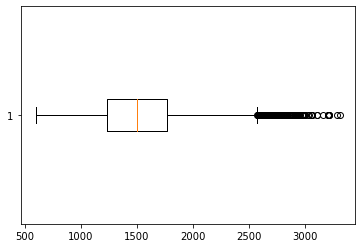

upper out 262


In [8]:
'''
Statistical approach
Do anomaly detection based on gameDuration, team1/team2_goldEarned, and team1/team2_kills
to find games where people "farm" stats and intentionally make games longer. 
We should get rid of these in order to only look at data from legitimate games. duration_data is in seconds
'''
duration_data = data['gameDuration']
plt.boxplot(duration_data, vert=False)
plt.show()
Q1 = duration_data.quantile(0.25)
Q3 = duration_data.quantile(0.75)
IQR = Q3 - Q1
upper_bound = 1.5*IQR + Q3
lower_bound = Q1 - 1.5*IQR 

upper_out = data[data['gameDuration'] > upper_bound]
print("upper out", len(upper_out.index))

In [9]:
'''
After sorting out the outlier data, we select our data for modeling and 
then re-scale it for better fitting of the model to the accurate data.
'''
from sklearn.preprocessing import StandardScaler

# remove outliers we found with the statistical approach
data = data[data['gameDuration'] < upper_bound]

# scale data in order to pass data into outlier detection models
data2 = data.copy().filter(regex='|'.join(whitelist))
scaled_data = StandardScaler().fit_transform(data2)
scaled_data = pd.DataFrame(scaled_data, columns=data2.columns)

outlier_test_data = scaled_data.filter(regex='|'.join(outlier_test_cols))
model_data = scaled_data.filter(regex='|'.join(model_cols))

print(scaled_data.columns)
print(outlier_test_data.columns)


Index(['t1p1_lp', 't1p1_min10_creeps', 't1p1_min10_damagetaken',
       't1p1_min10_gold', 't1p1_min10_xp', 't1p1_min15_creeps',
       't1p1_min15_damagetaken', 't1p1_min15_gold', 't1p1_min15_xp', 't1p2_lp',
       't1p2_min10_creeps', 't1p2_min10_damagetaken', 't1p2_min10_gold',
       't1p2_min10_xp', 't1p2_min15_creeps', 't1p2_min15_damagetaken',
       't1p2_min15_gold', 't1p2_min15_xp', 't1p3_lp', 't1p3_min10_creeps',
       't1p3_min10_damagetaken', 't1p3_min10_gold', 't1p3_min10_xp',
       't1p3_min15_creeps', 't1p3_min15_damagetaken', 't1p3_min15_gold',
       't1p3_min15_xp', 't1p4_lp', 't1p4_min10_creeps',
       't1p4_min10_damagetaken', 't1p4_min10_gold', 't1p4_min10_xp',
       't1p4_min15_creeps', 't1p4_min15_damagetaken', 't1p4_min15_gold',
       't1p4_min15_xp', 't1p5_lp', 't1p5_min10_creeps',
       't1p5_min10_damagetaken', 't1p5_min10_gold', 't1p5_min10_xp',
       't1p5_min15_creeps', 't1p5_min15_damagetaken', 't1p5_min15_gold',
       't1p5_min15_xp', 't2p1_lp',

# Outlier detection using models

In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# using domain knowledge and looking at the amount of outliers in the statistical
# approach, we believe that there will be around 1% of outliers  
outliers_fraction = 0.01

# we also tried EllipticEnvelope but it took a while to run, so we decided to 
# try isolationForest, LocalOutlierFactor, and OneClassSVM

# apply IsolationForest AD, don't use this one. It predicts a very high amount of 
# outliers. We think this is because of the high dimensionality of the data
if_outliers = IsolationForest(contamination='auto').fit_predict(outlier_test_data)
print(list(if_outliers).count(-1))

#apply LocalOutlierFactor AD
lof_outliers = LocalOutlierFactor(contamination='auto').fit_predict(outlier_test_data)
print(list(lof_outliers).count(-1))

#apply OneClassSVM AD
svm_outliers = OneClassSVM(nu=outliers_fraction).fit_predict(outlier_test_data)
print(list(svm_outliers).count(-1))

10693
210
602


In [11]:
# Get overlap of results from LOF and oneClassSVM
# Remove outliers that LOF and oneClassSVM deem to be outliers
rows_to_remove = []
for i in range(len(lof_outliers)):
  if lof_outliers[i] == -1 and svm_outliers[i] == -1:
    rows_to_remove.append(i)


# remove rows that LOF and oneClassSVM both deem as outliers
data.drop(rows_to_remove, axis=0, inplace=True)
scaled_data.drop(rows_to_remove, axis=0, inplace=True)
# rescale the data because we remove outliers
new_scaled_data = StandardScaler().fit_transform(scaled_data)
new_scaled_data = pd.DataFrame(scaled_data, columns=scaled_data.columns)
model_data = new_scaled_data.filter(regex='|'.join(model_cols))

# fix indices because dropping rows
data.index = range(len(data.index))
model_data.index = range(len(model_data.index))

# Using Models

In [12]:
# Store the accuracies of each model
accuracies = {}

In [13]:
# labels and features to be passed to the model
# features contains both 10 min, 15 min, and lp data
labels_df = data['t1_win']
labels = list(labels_df)
all_features = model_data

# we decided to use a subset of the data because the neural net and random forst
# were taking to long to run. According to ed post #298, that is ok
sample_num = 1000
small_all_features = model_data.sample(sample_num, random_state=53)
small_labels = []
for idx in small_all_features.index:
  small_labels.append(labels[idx])

# removing columns so that ten_min_features dataframe 
# only contains 10 minute data and lp
ten_min_CTR = [col for col in all_features.columns if '15' in col]
ten_min_features = all_features.drop(ten_min_CTR, axis=1, inplace=False)
small_ten_min_features = small_all_features.drop(ten_min_CTR, axis=1, inplace=False)

# removing columns so that ten_min_features dataframe 
# only contains 15 minute data and lp
fifteen_min_CTR = [col for col in all_features.columns if '10' in col]
fifteen_min_features =  all_features.drop(fifteen_min_CTR, axis=1, inplace=False)
small_fifteen_min_features = small_all_features.drop(fifteen_min_CTR, axis=1, inplace=False)

# Neural Network

Notice we use a grid search to find best hyperparameters

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
@ignore_warnings(category=ConvergenceWarning)
def run_nn(features, labels):
    nn_clf = MLPClassifier()
    pipe = Pipeline(steps=[("nn_clf", nn_clf)])
    
    param_grid = {
        'nn_clf__hidden_layer_sizes': [(30,), (40,), (50,), (60,)],
        'nn_clf__activation':['logistic', 'tanh', 'relu']
    }

    grid_search = GridSearchCV(pipe, param_grid, cv=5)

    nested_score = cross_val_score(grid_search, features, labels, cv=5)

    accuracy = nested_score.mean()*100
    return accuracy

In [15]:
# run the neural net on the small subset of the dataframe (slow)
accuracies['nn_10'] = run_nn(small_ten_min_features, small_labels)
accuracies['nn_15'] = run_nn(small_fifteen_min_features, small_labels)
accuracies['nn_all'] = run_nn(small_all_features, small_labels)


# Naive Bayes

In [16]:
'''
Are these factors independent to each other. If so how well does our model selection fit 
the data to predict which teams wins.
'''

from sklearn.naive_bayes import GaussianNB
def run_naive_bayes(features, labels):
  gaus_clf = GaussianNB()
  nested_score = cross_val_score(gaus_clf, features, labels, cv=10)
  accuracy = nested_score.mean() * 100
  return accuracy

In [17]:
# run naive bayes on the all of the data (because it runs fast)
accuracies['nb_10'] = run_naive_bayes(ten_min_features, labels)
accuracies['nb_15'] = run_naive_bayes(fifteen_min_features, labels)
accuracies['nb_all'] = run_naive_bayes(all_features, labels)

# Decision Tree

In [18]:
from sklearn.model_selection import cross_val_score

def run_dt(features, labels):
  clf = tree.DecisionTreeClassifier(criterion='entropy')
  scores = cross_val_score(clf, features, labels, cv=10) 
  accuracy = scores.mean() * 100
  return accuracy

In [19]:
# run decision tree on the all of the data (because it runs fast)
accuracies['dt_10'] = run_dt(ten_min_features, labels)
accuracies['dt_15'] = run_dt(fifteen_min_features, labels)
accuracies['dt_all'] = run_dt(all_features, labels)

# Random Forest

Notice we use a grid search to find best hyperparameters

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

def run_rf(features, labels):
    # Create a random forest classifier
    rf_clf = RandomForestClassifier()
    pipe = Pipeline(steps=[("rf_clf", rf_clf)])
    param_grid = {
        'rf_clf__n_estimators': [50, 75, 100, 150, 200, 250, 300, 400, 500]
    }
    grid_search = GridSearchCV(pipe, param_grid, cv=5)
    # Fit the random search object to the data
    grid_search.fit(features, labels)
    accuracy = grid_search.best_score_*100
    return accuracy

In [21]:
# run the random forest on the small subset of the dataframe (slow)
accuracies['rf_10'] = run_rf(small_ten_min_features, small_labels)
accuracies['rf_15'] = run_rf(small_fifteen_min_features, small_labels)
accuracies['rf_all'] = run_rf(small_all_features, small_labels)

# Results
Note we are using different training sets. The neural net and random forest are

being trained on a small (len 1000) subset of the data.

Since Decision Tree and Naive Bayes is fast, we run it on the entire dataset.

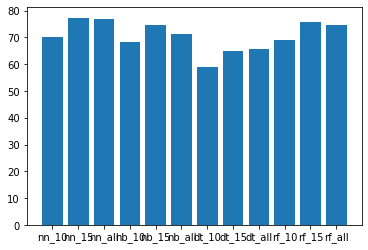

In [22]:
# plot the accuracies
plt.bar(accuracies.keys(),  accuracies.values())
plt.show()

In [33]:
print("nn = neural network")
print("nb = naive bayes")
print("dt = decision tree")
print("rf = random forest")
print("---------------")
print("model,accuracy")
for key, val in accuracies.items():
    print(key, round(val, 2))

nn = neural network
nb = naive bayes
dt = decision tree
rf = random forest
---------------
model,accuracy
nn_10 70.3
nn_15 77.3
nn_all 77.0
nb_10 68.11
nb_15 74.65
nb_all 71.38
dt_10 58.94
dt_15 64.98
dt_all 65.49
rf_10 69.1
rf_15 75.9
rf_all 74.6


# Discussion

* It is interesting to see that accuracy generally did NOT improve (or got slightly worse) when given all features vs just the min15 data.

* Still, it was cool to see a significant improvement in accuracy of 6-7% for each model when 
given data from 15 minutes vs 10 minutes into the game. This was a good sanity check for us since it lined up exactly with what we expected.

* Having more data at the 20/25/etc minutes may improve the "all" run for the models. 
However, there might be a point where only considering the data at the latest time stamp 
(closest to the end) would be better than considering all data.

* Tuning the depth of the rf tree might provide some benefits; however we decided to not tune the depth because 
we believe that the individual trees would be overfitting on different things.

* Naive Bayes seems to work very well with this dataset even though the data is highly dependent in our opinion. 
It is also extremely fast even when given the full dataset to train on. 

* We are overall happy with our results, and we definitely found out that the majority of the work was data cleaning/feature engineering!